# 時系列データの処理

本節ではpandasを利用して時系列データを処理する方法を学びます。

サンプルデータとして、厚生労働省の [新型コロナウイルス感染症 オープンデータ](https://www.mhlw.go.jp/stf/covid-19/open-data.html) データを利用します。

`read_csv` メソッドの引数 `parse_dates` に渡した列名は `datetime64[ns]` 型として処理されます。

In [22]:
import pandas as pd

df = pd.read_csv(
    "https://covid19.mhlw.go.jp/public/opendata/newly_confirmed_cases_daily.csv",
    parse_dates=["Date"],
)
df.head()

,Date,ALL,Hokkaido,Aomori,Iwate,Miyagi,Akita,Yamagata,Fukushima,Ibaraki,...,Ehime,Kochi,Fukuoka,Saga,Nagasaki,Kumamoto,Oita,Miyazaki,Kagoshima,Okinawa
0,2020-01-16,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2020-01-17,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2020-01-18,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2020-01-19,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2020-01-20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
df.dtypes[:5]

Date        datetime64[ns]
ALL                  int64
Hokkaido             int64
Aomori               int64
Iwate                int64
dtype: object

In [24]:
date = df.loc[:, "Date"]
type(date.dt)

pandas.core.indexes.accessors.DatetimeProperties

## .dtアクセサ

`Series` には「.dtアクセサ」と呼ばれる `datetime` 型の要素を操作できる機能があります。

https://pandas.pydata.org/pandas-docs/stable/reference/series.html#datetimelike-properties

In [25]:
date = df.loc[:, "Date"]
type(date.dt)

pandas.core.indexes.accessors.DatetimeProperties

`month` 属性では「月」を取得できます。

In [26]:
date.dt.month

0        1
1        1
2        1
3        1
4        1
        ..
1027    11
1028    11
1029    11
1030    11
1031    11
Name: Date, Length: 1032, dtype: int64

### 練習問題1

`date` オブジェクトから曜日名を取得してください。

In [27]:
# 解答セル

### DatetimeIndex

`DatetimeIndex` は時系列データに特化したインデックスです。さまざまな方法で要素にアクセスできます。

In [28]:
df.set_index("Date", inplace=True)
df.head()

,ALL,Hokkaido,Aomori,Iwate,Miyagi,Akita,Yamagata,Fukushima,Ibaraki,Tochigi,...,Ehime,Kochi,Fukuoka,Saga,Nagasaki,Kumamoto,Oita,Miyazaki,Kagoshima,Okinawa
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-16,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-17,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-18,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-19,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
df.index

DatetimeIndex(['2020-01-16', '2020-01-17', '2020-01-18', '2020-01-19',
               '2020-01-20', '2020-01-21', '2020-01-22', '2020-01-23',
               '2020-01-24', '2020-01-25',
               ...
               '2022-11-03', '2022-11-04', '2022-11-05', '2022-11-06',
               '2022-11-07', '2022-11-08', '2022-11-09', '2022-11-10',
               '2022-11-11', '2022-11-12'],
              dtype='datetime64[ns]', name='Date', length=1032, freq=None)

`loc` に `datetime` 型や文字列を指定できます。次のように文字列で指定できます。

In [30]:
df.loc["2020-02"]

,ALL,Hokkaido,Aomori,Iwate,Miyagi,Akita,Yamagata,Fukushima,Ibaraki,Tochigi,...,Ehime,Kochi,Fukuoka,Saga,Nagasaki,Kumamoto,Oita,Miyazaki,Kagoshima,Okinawa
Date,,,,,,,,,,,,,,,,,,,,,
2020-02-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-02-02,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-02-03,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-02-04,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-02-05,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-02-06,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-02-07,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-02-08,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-02-09,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
df.loc["2020-12":"2021-01"]

,ALL,Hokkaido,Aomori,Iwate,Miyagi,Akita,Yamagata,Fukushima,Ibaraki,Tochigi,...,Ehime,Kochi,Fukuoka,Saga,Nagasaki,Kumamoto,Oita,Miyazaki,Kagoshima,Okinawa
Date,,,,,,,,,,,,,,,,,,,,,
2020-12-01,2014,206,4,10,11,0,3,0,50,26,...,5,5,33,10,2,18,14,10,3,27
2020-12-02,2419,176,8,4,9,0,4,5,44,24,...,7,8,42,6,0,11,15,8,5,46
2020-12-03,2505,206,8,4,21,0,7,3,37,14,...,5,15,31,4,0,8,18,7,11,49
2020-12-04,2435,212,6,1,21,0,3,6,85,17,...,7,16,45,4,0,15,18,9,5,47
2020-12-05,2496,183,3,7,21,0,6,13,31,13,...,2,19,42,3,0,8,18,8,6,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-27,3968,147,4,6,27,2,10,25,84,38,...,15,1,185,7,11,22,14,17,10,131
2021-01-28,4122,115,4,0,27,2,7,15,60,34,...,1,6,185,7,28,15,22,17,13,96
2021-01-29,3547,111,3,0,13,5,15,14,86,44,...,8,6,159,2,18,19,20,14,19,63


### 練習問題2

`df` オブジェクトから2021年以降のデータを抽出してください。

In [32]:
# 解答セル

## 区間・期間の集計

「ALL」列をSeriesとして取得します。

In [33]:
all_prefs = df.loc[:, "ALL"]
all_prefs.head()

Date
2020-01-16    1
2020-01-17    0
2020-01-18    0
2020-01-19    0
2020-01-20    0
Name: ALL, dtype: int64

`resample` メソッドを実行することで、データをリサンプリングできます。次のコードでは7日ごとの移動平均を算出しています。

`resample` メソッドの引数には頻度（年、月など）を示す文字列を渡します。指定できる文字列はpandasの [User Guide](https://pandas.pydata.org/docs/user_guide/timeseries.html#dateoffset-objects) を参照してください。

In [34]:
all_prefs.resample("7D").mean()

Date
2020-01-16        0.142857
2020-01-23        1.000000
2020-01-30        1.000000
2020-02-06        0.285714
2020-02-13        5.142857
                  ...     
2022-10-13    35466.428571
2022-10-20    35412.857143
2022-10-27    46532.857143
2022-11-03    63343.142857
2022-11-10    77385.333333
Freq: 7D, Name: ALL, Length: 148, dtype: float64

`resample` メソッドの引数を`"1W"` （1週間）で渡した場合は日曜日を基準に算出します。

In [35]:
all_prefs.resample("1W").mean()

Date
2020-01-19        0.250000
2020-01-26        0.428571
2020-02-02        1.142857
2020-02-09        0.428571
2020-02-16        2.142857
                  ...     
2022-10-16    31241.714286
2022-10-23    33457.142857
2022-10-30    40330.285714
2022-11-06    57327.714286
2022-11-13    72115.833333
Freq: W-SUN, Name: ALL, Length: 148, dtype: float64

In [36]:
all_prefs.resample("1W").first()

Date
2020-01-19        1
2020-01-26        0
2020-02-02        0
2020-02-09        0
2020-02-16        0
              ...  
2022-10-16    13053
2022-10-23    15395
2022-10-30    16850
2022-11-06    22417
2022-11-13    31728
Freq: W-SUN, Name: ALL, Length: 148, dtype: int64

データを可視化することで、時系列の推移を視覚的に把握できるようになります。移動平均を算出することで、時系列データのトレンドが把握しやすくなったことがわかります。可視化方法については次章で解説します。

<AxesSubplot: title={'center': 'New cases of COVID-19'}, xlabel='Date'>

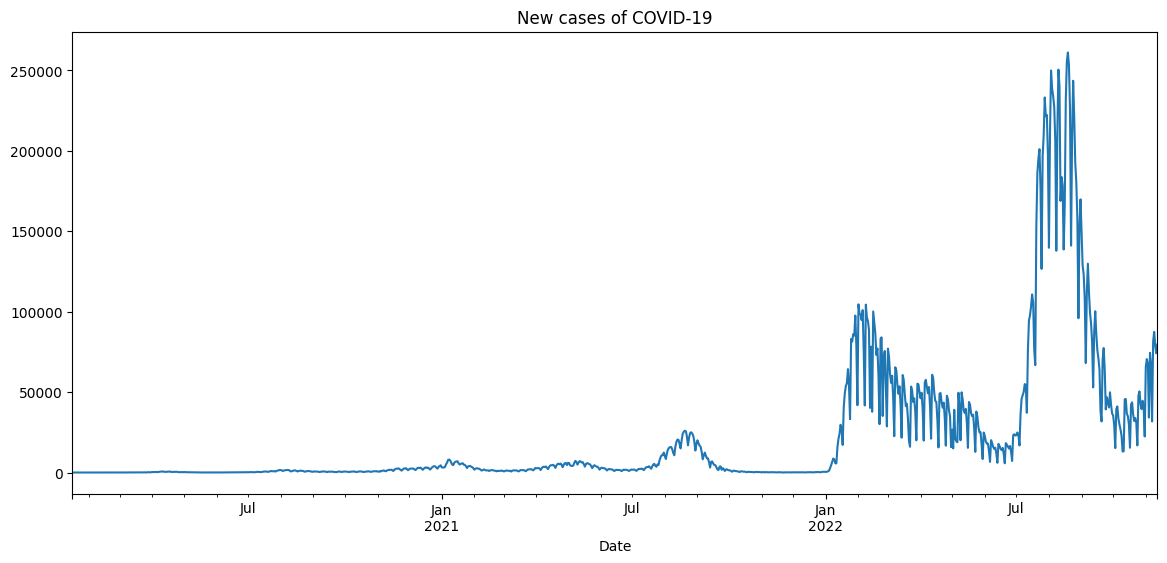

In [37]:
all_prefs.plot(title="New cases of COVID-19", figsize=(14, 6))

<AxesSubplot: title={'center': 'New cases of COVID-19'}, xlabel='Date'>

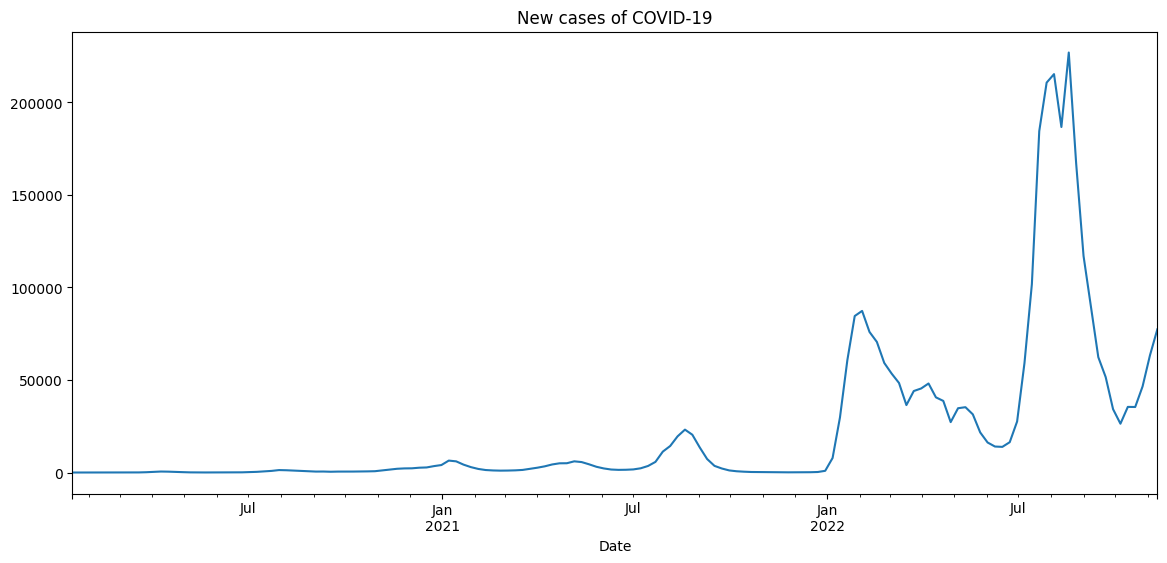

In [38]:
all_prefs.resample("7D").mean().plot(
    title="New cases of COVID-19", figsize=(14, 6)
)

### 練習問題3

`all_prefs` オブジェクトの20日間移動標準偏差(1σ)を算出してください。

In [39]:
# 解答セル

### 練習問題4

`df` オブジェクトから任意の都道府県のデータを可視化してください。

In [40]:
# 解答セル